**GEOSPATIAL ANALYSIS**

In [ ]:
import pandas as pd
import fol
import num

My study here on geopanda with python is based on the link below:

https://www.kaggle.com/learn/geospatial-analysis

- assuming youve installed geopandas, enter the code below to activate the environment

-- conda create -n geo_env

In [1]:
import geopandas as gpd

geospatial file formats such as shapefile,GeoJSON,KML,GPKG
to read run:

gpd.read_file()

In [5]:
full_data = gpd.read_file("DEClands.shp")

In [8]:
full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,UMPURL,SHAPE_AREA,SHAPE_LEN,geometry
0,2743,FOREST PRESERVE,AFP,FULTON CHAIN WILD FOREST,WILD FOREST,FULTON CHAIN,None,6,HERKIMER,https://www.dec.ny.gov/lands/75305.html,DECRP,3/11,HERKIMER,739.361639,4239,N,http://www.dec.ny.gov/lands/51309.html,2.992090e+06,14445.172046,"POLYGON ((502476.666 4842386.993, 502476.739 4..."
1,2744,FOREST PRESERVE,AFP,FULTON CHAIN WILD FOREST,WILD FOREST,FULTON CHAIN,None,6,HERKIMER,https://www.dec.ny.gov/lands/75305.html,DECRP,11/08,HERKIMER,7.538903,3841,N,http://www.dec.ny.gov/lands/51309.html,3.050886e+04,870.836410,"POLYGON ((502090.747 4840324.577, 502110.011 4..."
2,2745,FOREST PRESERVE,AFP,INDEPENDENCE RIVER WILD FOREST,WILD FOREST,INDEPENDENCE RIVER,None,6,LEWIS,https://www.dec.ny.gov/lands/58192.html,DECRP,8/19,LOWVILLE,76519.233602,4253,N,https://www.dec.ny.gov/lands/22574.html,3.096624e+08,270633.583850,"POLYGON ((508503.626 4864992.965, 509092.576 4..."
3,2746,FOREST PRESERVE,AFP,INDEPENDENCE RIVER WILD FOREST,WILD FOREST,INDEPENDENCE RIVER,None,6,LEWIS,https://www.dec.ny.gov/lands/58192.html,DECRP,3/11,LOWVILLE,223.803334,4252,N,https://www.dec.ny.gov/lands/22574.html,9.057000e+05,5609.447134,"POLYGON ((490114.810 4859403.501, 490142.561 4..."
4,2747,FOREST PRESERVE,AFP,INDEPENDENCE RIVER WILD FOREST,WILD FOREST,INDEPENDENCE RIVER,None,6,LEWIS,https://www.dec.ny.gov/lands/58192.html,DECRP,3/11,LOWVILLE,114.466837,4019,N,https://www.dec.ny.gov/lands/22574.html,4.632309e+05,2723.724659,"POLYGON ((481679.514 4853407.042, 481072.554 4..."


In [9]:
type(full_data)

geopandas.geodataframe.GeoDataFrame

In [16]:
full_data.loc[:,["CLASS","COUNTY","geometry"]].copy()

,CLASS,COUNTY,geometry
0,WILD FOREST,HERKIMER,"POLYGON ((502476.666 4842386.993, 502476.739 4..."
1,WILD FOREST,HERKIMER,"POLYGON ((502090.747 4840324.577, 502110.011 4..."
2,WILD FOREST,LEWIS,"POLYGON ((508503.626 4864992.965, 509092.576 4..."
3,WILD FOREST,LEWIS,"POLYGON ((490114.810 4859403.501, 490142.561 4..."
4,WILD FOREST,LEWIS,"POLYGON ((481679.514 4853407.042, 481072.554 4..."
...,...,...,...
2999,None,ALBANY,"POLYGON ((592614.788 4730677.364, 592772.235 4..."
3000,WILD FOREST,SARATOGA,"POLYGON ((585765.509 4786488.841, 585761.900 4..."
3001,None,LEWIS,"POLYGON ((470480.308 4836221.838, 470503.974 4..."
3002,None,LEWIS,"POLYGON ((456340.400 4813453.700, 455695.800 4..."


In [22]:
data.value_counts

<bound method DataFrame.value_counts of             CLASS    COUNTY                                           geometry
0     WILD FOREST  HERKIMER  POLYGON ((502476.666 4842386.993, 502476.739 4...
1     WILD FOREST  HERKIMER  POLYGON ((502090.747 4840324.577, 502110.011 4...
2     WILD FOREST     LEWIS  POLYGON ((508503.626 4864992.965, 509092.576 4...
3     WILD FOREST     LEWIS  POLYGON ((490114.810 4859403.501, 490142.561 4...
4     WILD FOREST     LEWIS  POLYGON ((481679.514 4853407.042, 481072.554 4...
...           ...       ...                                                ...
2999         None    ALBANY  POLYGON ((592614.788 4730677.364, 592772.235 4...
3000  WILD FOREST  SARATOGA  POLYGON ((585765.509 4786488.841, 585761.900 4...
3001         None     LEWIS  POLYGON ((470480.308 4836221.838, 470503.974 4...
3002         None     LEWIS  POLYGON ((456340.400 4813453.700, 455695.800 4...
3003         None    OSWEGO  POLYGON ((427425.836 4828336.731, 427436.210 4...

[3004 rows 

In [23]:
data.CLASS.value_counts()

WILD FOREST                   963
INTENSIVE USE                 107
PRIMITIVE                      63
WILDERNESS                     52
UNCLASSIFIED                   13
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

In [24]:
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST',"WILDERNESS"])].copy()

In [25]:
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,HERKIMER,"POLYGON ((502476.666 4842386.993, 502476.739 4..."
1,WILD FOREST,HERKIMER,"POLYGON ((502090.747 4840324.577, 502110.011 4..."
2,WILD FOREST,LEWIS,"POLYGON ((508503.626 4864992.965, 509092.576 4..."
3,WILD FOREST,LEWIS,"POLYGON ((490114.810 4859403.501, 490142.561 4..."
4,WILD FOREST,LEWIS,"POLYGON ((481679.514 4853407.042, 481072.554 4..."


In [29]:
#my own failed method of trying to select WILD FOREST and WILDERNESS

data['CLASS'] == 'WILD FOREST'
data['CLASS'] == 'WILDERNESS'

0       False
1       False
2       False
3       False
4       False
        ...  
2999    False
3000    False
3001    False
3002    False
3003    False
Name: CLASS, Length: 3004, dtype: bool

In [39]:
import matplotlib.pyplot as plt

<AxesSubplot:>

<Figure size 864x576 with 0 Axes>

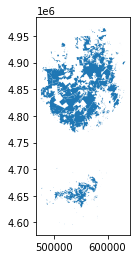

In [38]:
plt.figure(figsize=(12,8))
wild_lands.plot()

In [40]:
#GEOMETRY COLUMN
wild_lands.geometry.head()

0    POLYGON ((502476.666 4842386.993, 502476.739 4...
1    POLYGON ((502090.747 4840324.577, 502110.011 4...
2    POLYGON ((508503.626 4864992.965, 509092.576 4...
3    POLYGON ((490114.810 4859403.501, 490142.561 4...
4    POLYGON ((481679.514 4853407.042, 481072.554 4...
Name: geometry, dtype: geometry

identify POINT, LINESTRING and POLYGON

In [ ]:
POI_data = gdp.read_file("...shp")
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

roads_trail = gpd.read_file(..shp)
trails = roas_trail.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

countries = gpd.read_file(..shp)